# Activity 07

In [36]:
from bs4 import BeautifulSoup
import pandas as pd

In [41]:
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding='utf-8')
soup = BeautifulSoup(fd)
fd.close()

In [42]:
#Number of tables identified in the URL
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


In [44]:
# Verifying tables and their classes and find the right table
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [45]:
#separation of source and their corresponding data
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [46]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [47]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))
    
len(data_tables)

3

In [48]:
# Getting the source names from the list of sources
print(sources_list)

[<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td>, <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2017)</b><sup class="reference" id="cite_ref-worldbank_20-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">[20]</a></sup>
</td>, <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2016)</b><sup class="reference" id="cite_ref-21"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-21">[21]</a></sup><sup class="r

In [49]:
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [50]:
# Sepration of header and the data
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [51]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [52]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [53]:
gdp_data = pd.DataFrame(data_rows1, columns=header1)
gdp_data.head

<bound method NDFrame.head of     Rank                         Country  GDP(US$MM)
0      1                   United States  19,390,600
1      2                      China[n 1]  12,014,610
2      3                           Japan   4,872,135
3      4                         Germany   3,684,816
4      5                  United Kingdom   2,624,529
..   ...                             ...         ...
186  186  Federated States of Micronesia         329
187  187                           Palau         321
188  188                Marshall Islands         199
189  189                        Kiribati         186
190  190                          Tuvalu          40

[191 rows x 3 columns]>

In [54]:
#Performing same task for other two sources
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [55]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [57]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [58]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [59]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [60]:
gdp_data2 = pd.DataFrame(data_rows2, columns=header2)
gdp_data2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [61]:
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [62]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [63]:
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [65]:
gdp_data3 = pd.DataFrame(data_rows3, columns=header3)
gdp_data3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


# Activity 08

In [75]:
# Read the visit_data.csv file
df = pd.read_csv("visit_data.csv")
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [76]:
# Check if any essential column contain duplicates
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


In [77]:
# Check if any essential column contain NaN
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


In [78]:
#Before outlier elemination size
df.shape
earlier_size = df.shape[0]
print(earlier_size)

1000


In [79]:
import numpy as np
df = df[np.isfinite(df['visit'])] 
#After outlier elemination size
df.shape

(974, 7)

In [81]:
print("Size Difference : {}".format(earlier_size - df.shape[0]))

Size Difference : 26


{'whiskers': [<matplotlib.lines.Line2D at 0x155ca657400>,
 'caps': [<matplotlib.lines.Line2D at 0x155ca6579a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x155ca657130>],
 'medians': [<matplotlib.lines.Line2D at 0x155ca657f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x155ca644250>],
 'means': []}

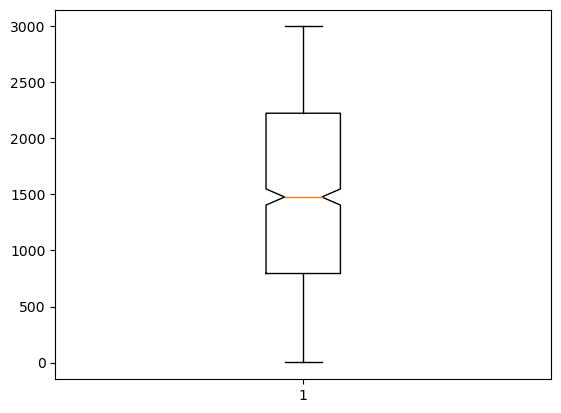

In [82]:
#Creating box-plot for outliers
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df.visit, notch=True)

In [83]:
#from the above box plot, we can say most of the data is concentrated between 1200 and 2200 approx, 
#lets define above 2500 and below 200 as outliers
df1 = df[(df['visit'] <= 2500) & (df['visit'] >= 200)]  # Notice the powerful & operator

{'whiskers': [<matplotlib.lines.Line2D at 0x155cbdbfc40>,
 'caps': [<matplotlib.lines.Line2D at 0x155cbdad220>,
 'boxes': [<matplotlib.lines.Line2D at 0x155cbdbf970>],
 'medians': [<matplotlib.lines.Line2D at 0x155cbdad7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x155cbdada30>],
 'means': []}

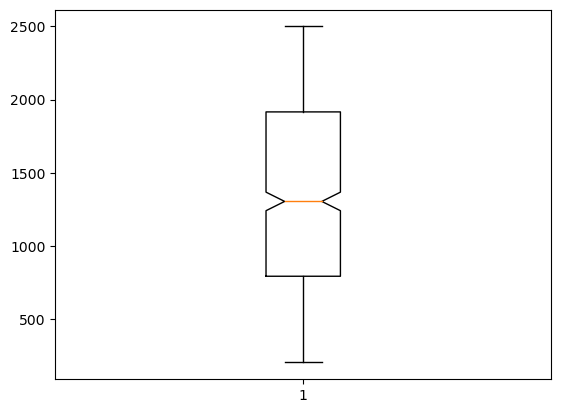

In [84]:
#lets plot the boxplot again after eleminating outlier
plt.boxplot(df1.visit, notch=True)

3. Insert data into a SQL Lite database – create a table with the following data below that you will create yourself (Hint on how to create the SQL: Python for Data Analysis 2nd edition page 191, Python for Data Analysis 3rd Edition: Page 199):
a. Name, Address, City, State, Zip, Phone Number
b. Add at least 10 rows of data and submit your code with a query generating your results.

In [85]:
import sqlite3

In [86]:
query = """
CREATE TABLE customer
(
Name VARCHAR(50), Address VARCHAR(100), City VARCHAR(20), State VARCHAR(2), Zip INTEGER, Phone VARCHAR(12)
);
"""

In [87]:
con =  sqlite3.connect('mydata.sqlite')
con.execute(query)

In [88]:
con.commit()

In [92]:
data = [('Xia','334 prince road', 'eiler', 'VA', 19923, '333-444-5555'),
         ('Arf','665 London road', 'yeatt', 'VA', 19623, '222-444-5555'),
         ('Erec','4773 Town road', 'vaert', 'VA', 15923, '111-444-5555'),
       ('Yeer','883 Car road', 'affee', 'VA', 15923, '112-444-5555'),
       ('Beeu','334 King road', 'faerc', 'VA', 16923, '554-444-5555'),
       ('Nerer','334 Ring road', 'eererc', 'NA', 19923, '667-444-5555'),
       ('Riine','222 Carolina road', 'arrev', 'VA', 14923, '887-444-5555'),
       ('Uuuer','666 Ruii road', 'rrree', 'VA', 12223, '776-444-5555'),
         ('Mmmer','773 Kaille road', 'eiler', 'TX', 33567, '553-444-5555'),
         ('Iiier','772 diseddr road', 'rrrew', 'VA', 77754, '335-444-5555'),
         ('Xieeer','779 kkejr road', 'ccerr', 'SC', 32356, '667-444-5555'),
         ('Nuuer','333 uutller road', 'eiler', 'VA', 67755, '777-444-5555'),
         ('Tuueer','111 glass road', 'wrwrw', 'DE', 44321, '755-444-5555')]

In [93]:
stmt = "INSERT INTO customer VALUES(?,?,?,?,?,?)"

In [95]:
con.executemany(stmt,data)

In [96]:
con.commit()

In [97]:
cursor =  con.execute('select * from customer')
rows = cursor.fetchall()
rows

[('Xia', '334 prince road', 'eiler', 'VA', 19923, '333-444-5555'),
 ('Arf', '665 London road', 'yeatt', 'VA', 19623, '222-444-5555'),
 ('Erec', '4773 Town road', 'vaert', 'VA', 15923, '111-444-5555'),
 ('Yeer', '883 Car road', 'affee', 'VA', 15923, '112-444-5555'),
 ('Beeu', '334 King road', 'faerc', 'VA', 16923, '554-444-5555'),
 ('Nerer', '334 Ring road', 'eererc', 'NA', 19923, '667-444-5555'),
 ('Riine', '222 Carolina road', 'arrev', 'VA', 14923, '887-444-5555'),
 ('Uuuer', '666 Ruii road', 'rrree', 'VA', 12223, '776-444-5555'),
 ('Mmmer', '773 Kaille road', 'eiler', 'TX', 33567, '553-444-5555'),
 ('Iiier', '772 diseddr road', 'rrrew', 'VA', 77754, '335-444-5555'),
 ('Xieeer', '779 kkejr road', 'ccerr', 'SC', 32356, '667-444-5555'),
 ('Nuuer', '333 uutller road', 'eiler', 'VA', 67755, '777-444-5555'),
 ('Tuueer', '111 glass road', 'wrwrw', 'DE', 44321, '755-444-5555')]